# **Deep Learning Homework 3: Convolutional Neural Networks**

## Can Abdullah Camuz - 2041519

### MSc Computer Science, Data Science, Cybersecurity @UniPD
### 2nd semester - 6 ECTS
### Prof. Nicolò Navarin & Prof. Alessandro Sperduti
---
In this homework, we will explore how to develop a simple Convolutional Neural Network for image classification. We will use the CIFAR-10 dataset. In the first part, we will learn how to develop a simple CNN, while in the second part we will explore the impact of various hyper-parameters in the learning performances.

## Exercise 3.1: Simple CNN

Let's start by importing Tensorflow, Keras and Numpy

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

## Load dataset:
### Load Data: CIFAR-10 dataset


We will use the CIFAR-10 dataset.The dataset consists of 60000 images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. Each sample is a 32x32 pixels color image, associated with a label from 10 classes:

```
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
```

Each pixel intensity is represented by a `uint8` (byte) from 0 to 255.
We will divide the dataset in training, testing and validation set. As you already know, the training set will be used to train the model, the validation set will be used to perform model selection and finally, the test set will be used to asses the performance of deep network.

Since we will use a [2DConv](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) we have to provide also a new dimension of the input that represents the number of channels (that in grey scale image is just one and in color images is 3). Therefore, if you are using grayscale images use [tf.expand_dims](https://www.tensorflow.org/api_docs/python/tf/expand_dims#:~:text=Used%20in%20the%20notebooks,-Used%20in%20the&text=This%20operation%20is%20useful%20to,to%20a%20tensor%20of%20scalars) to transform each image from a matrix to a 3-dimensional tensor. Finally, we have to normalize the input data.

In [2]:
cifar_10 = keras.datasets.cifar10
(X_train_full, y_train_full), (X_test, y_test) = (
    cifar_10.load_data()) # The dataset is already divede in test and training

# We extract the first 5000 samples of the training set, to use them as the validation set
X_valid, X_train = X_train_full[:5000], X_train_full[5000:] 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]


Let's take a look at a sample of the images in the dataset:

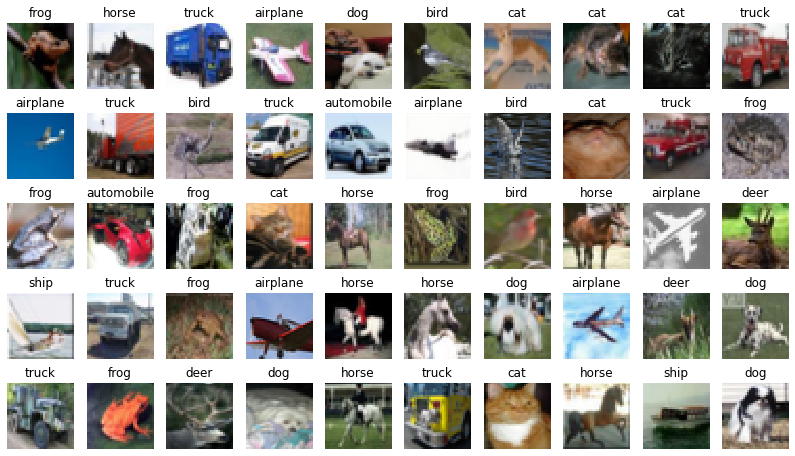

In [3]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols * 1.4, n_rows * 1.6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index][0]])
plt.show()

### [TO COMPLETE] Input Normalization:

When using Gradient Descent, it is usually a good idea to ensure that all the features have a similar scale. Try to standardize the pixel values.

In [4]:
#[TO COMPLETE]: define X_train_scaled, X_valid_scaled and X_test_scaled, the sets that contains 
#Hint: For each feature (pixel intensity), you must subtract the mean() of that 
#feature (across all instances, so use axis=0) and divide by its standard 
#deviation (std(), again axis=0)

X_train_scaled = (X_train - np.mean(X_train, axis = 0))/np.std(X_train, axis = 0)
X_valid_scaled = (X_valid - np.mean(X_train, axis = 0))/np.std(X_train, axis = 0)    
X_test_scaled = (X_test - np.mean(X_train, axis = 0))/np.std(X_train, axis = 0)

X_train = X_train_scaled #[TO COMPLETE]
X_valid = X_valid_scaled #[TO COMPLETE]
X_test = X_test_scaled #[TO COMPLETE]


#Add one dimension to manage the channel if you are using grayscale images.
#X_train=tf.expand_dims(X_train, 3)
#X_valid=tf.expand_dims(X_valid, 3)
#X_test=tf.expand_dims(X_test,3)

#Make sure you compute the means and standard deviations on the training set,
#and use these statistics to scale the training set, the validation set and the
#test set

### Define the model

Let's create a simple CNN. The model will be composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 ([MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D))
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function to ensure that the sum of all the estimated class probabilities for each image is equal to 1.
Note that as 'input_shape' attribute's value in the first layer report also the third dimension that represents the channel.

In [5]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], padding="same", activation="relu", input_shape=[32, 32, 3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])


Print the model summary

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 10)                81930     
                                                                 
Total params: 82,826
Trainable params: 82,826
Non-trainable params: 0
_________________________________________________________________


In [8]:
len(y_train)

45000

Note that the number of parameters mostly depends on the output layers, indeed the parameter sharing techinique used by the 2D convolutional layers allows to significantly reduce the number of learnable weights.
Now we can train the model.

In [8]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
352/352 [==============================] - 23s 62ms/step - loss: 1.4486 - accuracy: 0.4943 - val_loss: 1.2703 - val_accuracy: 0.5566
Epoch 2/10
352/352 [==============================] - 22s 62ms/step - loss: 1.1543 - accuracy: 0.6012 - val_loss: 1.1259 - val_accuracy: 0.6018
Epoch 3/10
352/352 [==============================] - 22s 62ms/step - loss: 1.0385 - accuracy: 0.6435 - val_loss: 1.0920 - val_accuracy: 0.6210
Epoch 4/10
352/352 [==============================] - 22s 61ms/step - loss: 0.9644 - accuracy: 0.6678 - val_loss: 1.0324 - val_accuracy: 0.6476
Epoch 5/10
352/352 [==============================] - 22s 62ms/step - loss: 0.9118 - accuracy: 0.6875 - val_loss: 1.0554 - val_accuracy: 0.6392
Epoch 6/10
352/352 [==============================] - 22s 62ms/step - loss: 0.8730 - accuracy: 0.6989 - val_loss: 1.0321 - val_accuracy: 0.6546
Epoch 7/10
352/352 [==============================] - 22s 62ms/step - loss: 0.8372 - accuracy: 0.7125 - val_loss: 1.0145 - val_accuracy:

Plot the loss and the accuracy trends for the training and validation set. Then, compute the result on the test set.

313/313 - 2s - loss: 1.0470 - accuracy: 0.6451 - 2s/epoch - 7ms/step
accuracy: 64.51%


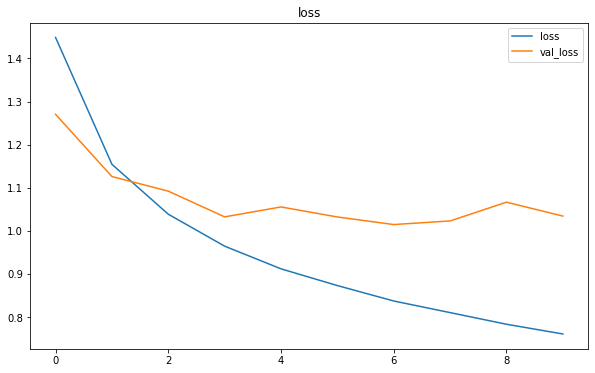

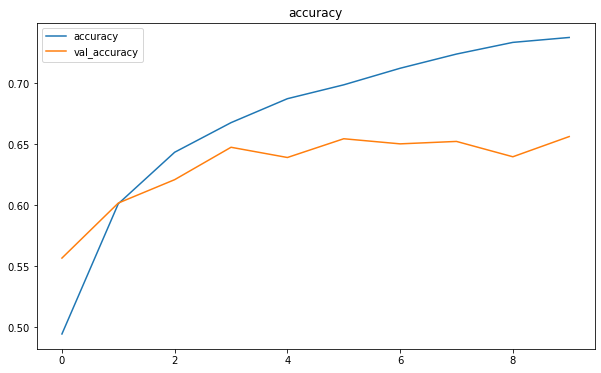

In [9]:
def plot_loss(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['loss'], label='loss')
  plt.plot(history.epoch,history.history['val_loss'],label='val_loss')
  plt.title('loss')
  plt.legend()
  
def plot_accuracy(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['accuracy'],label='accuracy')
  plt.plot(history.epoch,history.history['val_accuracy'],label='val_accuracy')
  plt.title('accuracy')
  plt.legend()
  
plot_loss(history)

plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



### Visualize Weights

An interesting thing to do is to visualize the learned weights for the convolutional layer. We have 32 kernels of size 3x3, we can just plot them as images, mapping the weight values to grayscale.

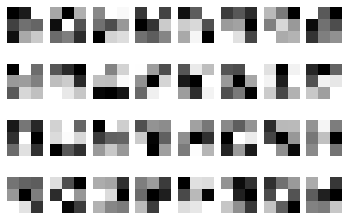

In [10]:
# Weights for the first convolutional layer
w0=model.get_weights()[0][:,:,0,:]

# Normalize to range 0.0 - 1.0
w0-=np.min(w0)
w0/=np.max(w0)

for r in range(4):
    for c in range(8):
        n=r*8+c
        plt.subplot(4, 8, n+1)
        plt.imshow(w0[:,:,n], interpolation='none')
        plt.axis('off')
        plt.gray()
plt.show()

They might be a bit hard to interpret, but it seems that the various filters have learned to detect various corners and edges.

### [TO COMPLETE] Deep CNN
Let's consider a deeper model, more precisely in this exercise we consider a model composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 
* One 2D convolutional layer with kernel size 2x2 and 16 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function


In [11]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
  
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 16)        2064      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 10)               

[TO COMPLETE] Explain in this cell: 

1.   How the number of parameters on each of the two Conv2D layers is determined,
2.   The reasons why the two considered convolutional layers have a different number of parameters.

Answers:


1.   [TO COMPLETE] **Answer to question 1**

The number of parameters in a Convolutional Layer is equal to the number of the trainable weigts (in the kernel) and the biases. For the first layer, where the kernel size is 3 x 3 x 3 (height, width and the # of channels RGB), there are 32 filters (kernels). Hence, the # of parameters is: 

3 x 3 x 3 x 32 = 864

And there are the biases equal to the # of filters:

864 + 32 = 896 **---> Total parameters in the first convolutional layer**

For the second convolutional layer, we know that the output of the first layer has a shape of 30 x 30 x 32 (because of the filters applied, 32 - 3 + 1 = 30, and there are 32 filters, this explains the shape of the output) Kernel size is 2 x 2, and the previous activation yields a kernel dimension of 2 x 2 x 32. Considering that there are 16 filters, the # of parameters is calculated:

2 x 2 x 32 x 16 = 2048

2048 + 16 = 2064 **---> Total parameters in the second convolutional layer**


2.   [TO COMPLETE] **Answer to question 2**

Since the # of parameters is calculated via the kernel sizes, # of filters and the biases, we should seek for the difference among those to answer this question. It is obvious that firstly, different kernel sizes (in first conv layer 3 x 3, in second 2 x 2) and different filter quantities (32 in the first and 16 in the second) causes the difference. However, the main difference is caused by the the 3rd dimension of the kernel tensor. Kernel tensor has a 3rd dimension of 3 in the first layer, and this increases up to 32 in the second conv. layer. (3 x 3 x 3 **vs** 2 x 2 x 32) **This is because the 3rd kernel dimension has to match the depth of the input**; the input of the first Conv. Layer has a shape of 32 x 32 x 3, while the input of the second is 15 x 15 x 32. Therefore, we can conclude that even with the same kernel sizes and same filter quantities, the # of parameters would be different among the layers.

Let's now train our deep CNN.

Epoch 1/10
352/352 [==============================] - 26s 74ms/step - loss: 1.5952 - accuracy: 0.4323 - val_loss: 1.3500 - val_accuracy: 0.5292
Epoch 2/10
352/352 [==============================] - 26s 74ms/step - loss: 1.2799 - accuracy: 0.5483 - val_loss: 1.2250 - val_accuracy: 0.5688
Epoch 3/10
352/352 [==============================] - 25s 72ms/step - loss: 1.1678 - accuracy: 0.5909 - val_loss: 1.1298 - val_accuracy: 0.6010
Epoch 4/10
352/352 [==============================] - 25s 72ms/step - loss: 1.0887 - accuracy: 0.6216 - val_loss: 1.0859 - val_accuracy: 0.6208
Epoch 5/10
352/352 [==============================] - 26s 72ms/step - loss: 1.0361 - accuracy: 0.6406 - val_loss: 1.0431 - val_accuracy: 0.6342
Epoch 6/10
352/352 [==============================] - 25s 72ms/step - loss: 1.0011 - accuracy: 0.6540 - val_loss: 1.0152 - val_accuracy: 0.6482
Epoch 7/10
352/352 [==============================] - 25s 72ms/step - loss: 0.9719 - accuracy: 0.6644 - val_loss: 1.0035 - val_accuracy:

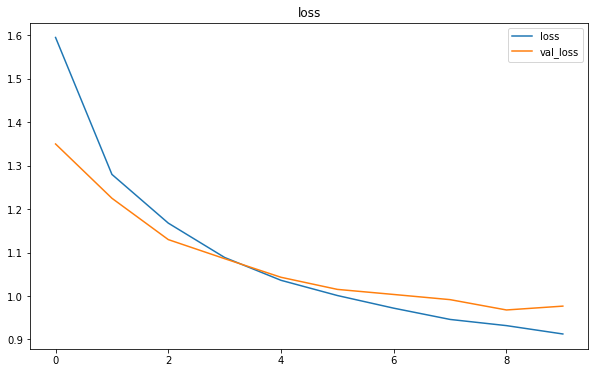

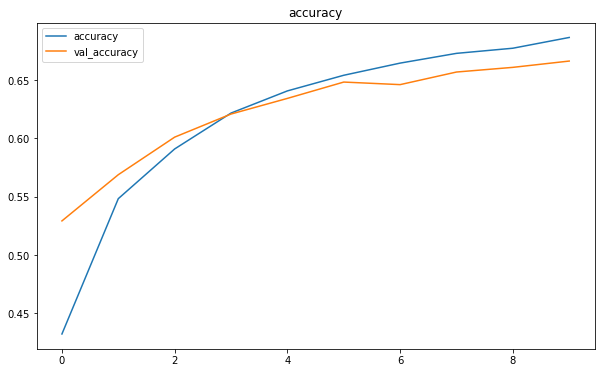

In [12]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

## [TO COMPLETE] Exercise 3.2: Develop a better CNN
Let's develop a network that performs better than the very simple one above. This exercise aims to explore how much the various hyper-parameters influence the classification capability of the model. 

**[TO COMPLETE]**: Your task is to modify some of the hyper-parameters of the previous exercise's network and compare the results. At least one of the models you try should have an improvement in the test set results (generalization) over the result of the model used in the previous exercise.
In the cell below report only the code of the **best model** that you can find. In addtion, print out its result on the test set, and plot the accuracy and the loss trends in the notebook you return.
Moreover, for each setup you test, analyze and discuss the obtained results briefly in the last cells at the bottom.

Hint: Each reparameterization should change a different aspect in the network, while the rest of the parameters would stay the same. 
Example parameters to try to change (we suggest to test at least one re-parametrization for each of these categories):

*    number of layers or neurons or filters dimension
*   activation functions
*   epochs
*   batch sizes
*   optimizer, see TensorFlow documentation on [optimizers](https://https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
*   max-pooling on/off on certain layers, or pool size

For what concerns the optimizer, as you can see in the 'compile' method [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) is it possible to pass as 'optimizer ' attribute's value a string (the name of optimizer) or an optimizer instance.

Notice that changing the final layer's softmax activation plus the categorical_crossentropy loss requires some consideration. Don't do it unless you have a good plan.

In [36]:
#[TO COMPLETE]

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3]),
    keras.layers.Conv2D(filters=64, kernel_size=[3,3], activation='relu'),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu'),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
  
print(model.summary())


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 conv2d_40 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 12, 12, 32)        18464     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 6, 6, 32)         0         
 g2D)                                                            
                                                                 
 flatten_13 (Flatten)        (None, 1152)            

In [37]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64,
                  validation_data=(X_valid, y_valid))


Epoch 1/10
704/704 [==============================] - 153s 217ms/step - loss: 1.4584 - accuracy: 0.4777 - val_loss: 1.1865 - val_accuracy: 0.5808
Epoch 2/10
704/704 [==============================] - 134s 190ms/step - loss: 1.0504 - accuracy: 0.6354 - val_loss: 0.9610 - val_accuracy: 0.6656
Epoch 3/10
704/704 [==============================] - 130s 185ms/step - loss: 0.9141 - accuracy: 0.6843 - val_loss: 0.8802 - val_accuracy: 0.7006
Epoch 4/10
704/704 [==============================] - 125s 177ms/step - loss: 0.8250 - accuracy: 0.7141 - val_loss: 0.8823 - val_accuracy: 0.6916
Epoch 5/10
704/704 [==============================] - 306s 435ms/step - loss: 0.7620 - accuracy: 0.7359 - val_loss: 0.8326 - val_accuracy: 0.7146
Epoch 6/10
704/704 [==============================] - 117s 167ms/step - loss: 0.7141 - accuracy: 0.7507 - val_loss: 0.8376 - val_accuracy: 0.7156
Epoch 7/10
704/704 [==============================] - 113s 160ms/step - loss: 0.6730 - accuracy: 0.7640 - val_loss: 0.8209 -

313/313 - 4s - loss: 0.8683 - accuracy: 0.7185 - 4s/epoch - 12ms/step
 accuracy: 71.85%
----------------------------


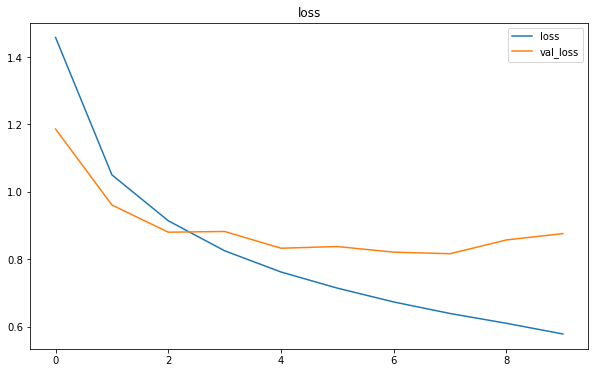

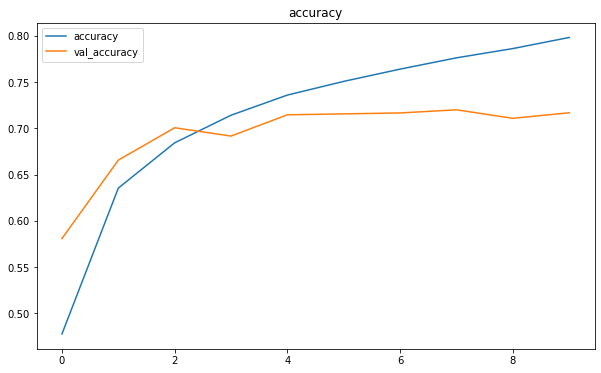

In [38]:
plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

## [TO COMPLETE] Example of tests discussion
### **The best model that I found...** is the above model with following parameters:

* 1 convolution layer with 64 filters and 3 x 3 kernel size
* 1 convolution layer with 64 filters and 3 x 3 kernel size
* 1 pooling layer 2 x 2 sized 
* 1 convolution layer with 32 filters and 3 x 3 kernel size
* 1 pooling layer 2 x 2 sized
* "relu" activation for convolutional layers
* "softmax" activation for output layer
* batch size of 64
* "adam" as optimiser
* 10 epochs


### **The achieved accuracy in the test set is** 71,85 %

### **Discussion:**
The kernel size of 3x3 performed better compared to 2x2 size, which was something I did not expect. But I think it is because a 3x3 filter captures the surrounding pixels more, which causes a noise while a 2x2 kernel is is better at capturing sharp corners or edges.

"adam" optimiser and 64 filters better than 16 and 32 filters. This is because a SGD is too slow to find a good minimum in 10 epochs, while Adam is robust structure, combining both adaptive learning rates and momentum and manages to converge the optimum  in 10 epochs. And for the 32 filters, I expect that the more filters we have, the more different features we can capture in our model and a better classification can be made.

### **Besides, I tested also other models:** (over 70% of accuracy)

* Model 1: Conv. layers: 2 kernel: 3x3, filters: 128, batch: 512, pooling size: 2x2 opt: adam, epochs: 10 --- val_accuracy: 70.18%
* Model 2: Conv. layers: 3 kernel: 2x2, filters: 64, batch: 128, pooling size: 2x2 opt: adam, epochs: 10 --- val_accuracy: 70.90%
* Model 3: Conv. layers: 3 kernel: 3x3, filters: 64, batch: 64, pooling size: 2x2 opt: adam, epochs: 10 --- val_accuracy: 71.02%
* Model 4: Conv. layers: 6 kernel: 3x3, filters: 64, batch: 64, pooling size: 2x2 opt: adam, epochs: 10 --- val_accuracy: 70.62%
* Model 5: Conv. layers: 3 kernel: 2x2, filters: 32, batch: 128, pooling size: 2x2 opt: adam, epochs: 10 --- val_accuracy: 71.09%


## **Discussion:[TO COMPLETE]**

* Smaller batch size has caused a slight increase on the accuracy. I also noticed that smaller batch sizes has a tendency to overfit much faster by learning more.

* 3 conv. layers performed better than 2 layers. I did not use a very deep model in order to see the effects of the small changes and since it takes so much execution time.

* Increasing the filter quantity has become useful since the model could learn the structures more detailed. Yet, It causes high complexity and too much execution time.

* The hyperparameters that I changed were the number of layers, number of filters, kernel size and the batch size. The most significant effect was done by the number of layers and the number of filters.